In [2]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.losses import mean_squared_error

In [3]:
encodingDim = 2
inputImg = Input(shape=(4,))
encodedIP = Dense(encodingDim,activation ='linear')(inputImg)
decodedIP = Dense(4,activation='linear')(encodedIP)

In [4]:
autoencoder = Model(inputImg,output = decodedIP)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [5]:
encoder = Model(input = inputImg,output= encodedIP)
encodedShaped = Input(shape=(encodingDim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input = encodedShaped, output = decoder_layer(encodedShaped))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [6]:
autoencoder.compile(optimizer='adadelta', loss = mean_squared_error)

In [8]:
from sklearn.datasets import load_iris
import numpy as np

In [9]:
iris = load_iris()

data = iris.data
feature_names = iris.feature_names

labels = iris.target
label_names = iris.target_names

In [10]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
label_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

maxs = np.amax(data, axis=0)
mins = np.amin(data, axis=0)

x_train = (data - mins) / (maxs - mins)

x_train.shape

(150, 4)

In [16]:
autoencoder.fit(x_train,x_train,epochs=12,verbose=1,batch_size=32,shuffle=True)

Epoch 1/12
150/150 [==============================] - 0s 65us/step - loss: 0.0408
Epoch 2/12
150/150 [==============================] - 0s 80us/step - loss: 0.0368
Epoch 3/12
150/150 [==============================] - 0s 129us/step - loss: 0.0332
Epoch 4/12
150/150 [==============================] - 0s 125us/step - loss: 0.0300
Epoch 5/12
150/150 [==============================] - 0s 129us/step - loss: 0.0272
Epoch 6/12
150/150 [==============================] - 0s 135us/step - loss: 0.0248
Epoch 7/12
150/150 [==============================] - 0s 122us/step - loss: 0.0227
Epoch 8/12
150/150 [==============================] - 0s 134us/step - loss: 0.0209
Epoch 9/12
150/150 [==============================] - 0s 127us/step - loss: 0.0194
Epoch 10/12
150/150 [==============================] - 0s 135us/step - loss: 0.0181
Epoch 11/12
150/150 [==============================] - 0s 174us/step - loss: 0.0170
Epoch 12/12
150/150 [==============================] - 0s 156us/step - loss: 0.0160


In [17]:
encoded = encoder.predict(x_train)

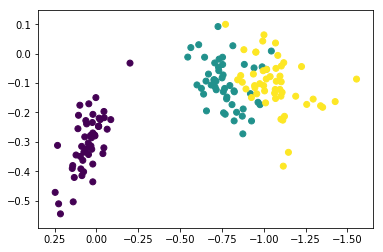

In [31]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(encoded[:, 0], encoded[:, 1], c=labels)
plt.gca().invert_xaxis()
plt.show()

In [24]:
## PCA ##

x = (data - means) / stds

In [25]:
cov = np.matmul(x.transpose(), x) / (x.shape[0] - 1)

In [26]:
eig, axes = np.linalg.eig(cov)

In [27]:
eig

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [28]:
pc2d = np.matmul(x, axes[:, 0:2])

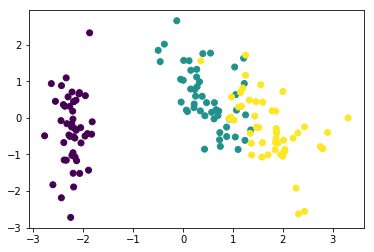

In [29]:
pc1 = np.array(pc2d[:, 0].transpose())
pc2 = np.array(pc2d[:, 1].transpose())

plt.scatter(pc1, pc2, c=labels)
plt.show()